In [1]:
from pynq import Overlay
import numpy as np
import pandas as pd
ol = Overlay("lenet_full.bit")
#ol = Overlay("timing_lenet.bit")


ol.ip_dict
 

{'dense_0': {'type': 'ayush:cnn:dense:1.0',
  'mem_id': 's_axi_control',
  'memtype': 'REGISTER',
  'gpio': {},
  'interrupts': {},
  'parameters': {'C_S_AXI_CONTROL_ADDR_WIDTH': '6',
   'C_S_AXI_CONTROL_DATA_WIDTH': '32',
   'C_M_AXI_GMEM_ID_WIDTH': '1',
   'C_M_AXI_GMEM_ADDR_WIDTH': '64',
   'C_M_AXI_GMEM_DATA_WIDTH': '32',
   'C_M_AXI_GMEM_AWUSER_WIDTH': '1',
   'C_M_AXI_GMEM_ARUSER_WIDTH': '1',
   'C_M_AXI_GMEM_WUSER_WIDTH': '1',
   'C_M_AXI_GMEM_RUSER_WIDTH': '1',
   'C_M_AXI_GMEM_BUSER_WIDTH': '1',
   'C_M_AXI_GMEM_USER_VALUE': '0x00000000',
   'C_M_AXI_GMEM_PROT_VALUE': '"000"',
   'C_M_AXI_GMEM_CACHE_VALUE': '"0011"',
   'C_M_AXI_GMEM_ENABLE_ID_PORTS': 'true',
   'C_M_AXI_GMEM_ENABLE_USER_PORTS': 'false',
   'Component_Name': 'design_1_dense_0_0',
   'clk_period': '10',
   'machine': '64',
   'combinational': '0',
   'latency': '250306',
   'II': 'x',
   'EDK_IPTYPE': 'PERIPHERAL',
   'C_S_AXI_CONTROL_BASEADDR': '0x40000000',
   'C_S_AXI_CONTROL_HIGHADDR': '0x4000FFFF',
   'ADD

In [2]:
from pynq import ps

print(ps.Clocks.fclk0_mhz)
ps.Clocks.fclk0_mhz = 110
print(ps.Clocks.fclk0_mhz)
print(ps.Clocks.cpu_mhz)

31.25
111.111111
650.0


/usr/local/share/pynq-venv/lib/python3.10/site-packages/pynq/ps.py:434: UserWarning: Setting frequency to the closest possible value 111.11111MHz.
  warnings.warn(


In [3]:
dense_ip = ol.dense_0
mmio1 = dense_ip.mmio
conv1_ip =ol.conv1_0
mmio2 = conv1_ip.mmio 
conv2_ip = ol.conv2_0
mmio1 = conv2_ip.mmio

In [4]:
dense_ip.register_map

RegisterMap {
  CTRL = Register(AP_START=0, AP_DONE=0, AP_IDLE=1, AP_READY=0, RESERVED_1=0, AUTO_RESTART=0, RESERVED_2=0, INTERRUPT=0, RESERVED_3=0),
  GIER = Register(Enable=0, RESERVED=0),
  IP_IER = Register(CHAN0_INT_EN=0, CHAN1_INT_EN=0, RESERVED_0=0),
  IP_ISR = Register(CHAN0_INT_ST=0, CHAN1_INT_ST=0, RESERVED_0=0),
  inputs_1 = Register(inputs=write-only),
  inputs_2 = Register(inputs=write-only),
  final_1 = Register(final=write-only),
  final_2 = Register(final=write-only)
}

In [5]:
conv1_ip.register_map

RegisterMap {
  CTRL = Register(AP_START=0, AP_DONE=0, AP_IDLE=1, AP_READY=0, RESERVED_1=0, AUTO_RESTART=0, RESERVED_2=0, INTERRUPT=0, RESERVED_3=0),
  GIER = Register(Enable=0, RESERVED=0),
  IP_IER = Register(CHAN0_INT_EN=0, CHAN1_INT_EN=0, RESERVED_0=0),
  IP_ISR = Register(CHAN0_INT_ST=0, CHAN1_INT_ST=0, RESERVED_0=0),
  input_r_1 = Register(input_r=write-only),
  input_r_2 = Register(input_r=write-only),
  final_buffer_1 = Register(final_buffer=write-only),
  final_buffer_2 = Register(final_buffer=write-only)
}

In [6]:
conv2_ip.register_map

RegisterMap {
  CTRL = Register(AP_START=0, AP_DONE=0, AP_IDLE=1, AP_READY=0, RESERVED_1=0, AUTO_RESTART=0, RESERVED_2=0, INTERRUPT=0, RESERVED_3=0),
  GIER = Register(Enable=0, RESERVED=0),
  IP_IER = Register(CHAN0_INT_EN=0, CHAN1_INT_EN=0, RESERVED_0=0),
  IP_ISR = Register(CHAN0_INT_ST=0, CHAN1_INT_ST=0, RESERVED_0=0),
  input_r_1 = Register(input_r=write-only),
  input_r_2 = Register(input_r=write-only),
  final_buffer_1 = Register(final_buffer=write-only),
  final_buffer_2 = Register(final_buffer=write-only)
}

# Neural Network Architecture

This notebook outlines a simple feedforward neural network architecture consisting of two convolutional layers followed by a dense (fully connected) layer.

## Network Structure

1. **Convolutional Layer 1 (Conv1)**
   - Input Shape: (784,)
   - Output Shape: (864,)

2. **Convolutional Layer 2 (Conv2)**
   - Input Shape: (864,)
   - Output Shape: (256,)

3. **Dense Layer**
   - Input Shape: (256,)
   - Output Shape: (10,)

## Diagram

```plaintext
[ Input (784) ] 
        |
    [ Conv1 (864) ]
        |
    [ Conv2 (256) ]
        |
    [ Dense (10) ]


In [7]:
from pynq import allocate
import numpy as np 
 
a = allocate(shape=(784,), dtype=np.float32)   #input1
b = allocate(shape=(864,), dtype=np.float32)   #output_1 

c = allocate(shape=(864,), dtype=np.float32)   #input_2 
d = allocate(shape=(256,), dtype=np.float32)   #output_2 
 
e = allocate(shape=(256,), dtype=np.float32)   #input_3 
f = allocate(shape=(10,), dtype=np.float32)   #output_3 
   


In [8]:
print("py_buffer physical address {}".format(hex(a.physical_address)))
print("py_buffer physical address {}".format(hex(b.physical_address)))
print("py_buffer physical address {}".format(hex(c.physical_address)))
print("py_buffer physical address {}".format(hex(d.physical_address)))
print("py_buffer physical address {}".format(hex(e.physical_address)))
print("py_buffer physical address {}".format(hex(f.physical_address)))

py_buffer physical address 0x16849000
py_buffer physical address 0x1684a000
py_buffer physical address 0x1684b000
py_buffer physical address 0x1684c000
py_buffer physical address 0x1684d000
py_buffer physical address 0x1684e000


In [9]:
conv1_ip.register_map.input_r_1 = a.physical_address 
conv1_ip.register_map.final_buffer_1  = b.physical_address

conv2_ip.register_map.input_r_1 = c.physical_address 
conv2_ip.register_map.final_buffer_1  = d.physical_address

dense_ip.register_map.inputs_1 = e.physical_address 
dense_ip.register_map.final_1  = f.physical_address

In [10]:
def hw_lenet(test2):

    a[:] = test2


    conv1_ip.register_map.CTRL.AP_START =1

    # Wait until algorithm has completed
    while (conv1_ip.register_map.CTRL.AP_DONE == 0):
        pass



    ##second conv starts
    c[:] = b
    conv2_ip.register_map.CTRL.AP_START =1

    # Wait until algorithm has completed
    while (conv2_ip.register_map.CTRL.AP_DONE == 0):
        pass


    ##dense layer starts
    e[:] = d
    dense_ip.register_map.CTRL.AP_START =1

    # Wait until algorithm has completed
    while (dense_ip.register_map.CTRL.AP_DONE == 0):
        pass
    return f

###  Load MNist dataset 

In [11]:
import numpy as np
import gzip
import os

def load_mnist_images(filename):
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    return data.reshape(-1, 1, 28, 28)

def load_mnist_labels(filename):
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=8)
    return data

def normalize(images):
    return (images.astype(np.float32) / 255.0 - 0.1307) / 0.3081

# File names for the MNIST dataset
train_images_file = "train-images-idx3-ubyte.gz"
train_labels_file = "train-labels-idx1-ubyte.gz"
test_images_file = "t10k-images-idx3-ubyte.gz"
test_labels_file = "t10k-labels-idx1-ubyte.gz"

# Check if files exist
files_exist = all(os.path.exists(f) for f in [train_images_file, train_labels_file, test_images_file, test_labels_file])

if not files_exist:
    print("MNIST dataset files not found. Please download the files manually:")
    print("1. Go to http://yann.lecun.com/exdb/mnist/")
    print("2. Download the following files:")
    print("   - train-images-idx3-ubyte.gz")
    print("   - train-labels-idx1-ubyte.gz")
    print("   - t10k-images-idx3-ubyte.gz")
    print("   - t10k-labels-idx1-ubyte.gz")
    print("3. Place the downloaded files in the same directory as this script.")
    print("4. Run this script again.")
else:
    # Load and normalize the dataset
    print("Loading and normalizing MNIST dataset...")
    X_train = normalize(load_mnist_images(train_images_file))
    y_train = load_mnist_labels(train_labels_file)
    X_test = normalize(load_mnist_images(test_images_file))
    y_test = load_mnist_labels(test_labels_file)

    print(f"Training set shape: {X_train.shape}")
    print(f"Test set shape: {X_test.shape}")


Loading and normalizing MNIST dataset...
Training set shape: (60000, 1, 28, 28)
Test set shape: (10000, 1, 28, 28)


In [12]:
import numpy as np
import matplotlib.pyplot as plt
 
import time
 
class TestSetIterator:
    def __init__(self, X_test, y_test):
        self.X_test = X_test
        self.y_test = y_test
        self.current_index = 0

    def next(self):
        if self.current_index >= len(self.X_test):
            raise StopIteration("All samples have been processed.")
        
        sample_X = self.X_test[self.current_index:self.current_index+1]
        sample_y = self.y_test[self.current_index:self.current_index+1]
        
        self.current_index += 1
        
        return sample_X, sample_y

# Create an instance of TestSetIterator
test_iterator = TestSetIterator(X_test, y_test)
 

In [13]:
def estimate_conv1_ops():
    # Convolution: 1 input channel, 6 output channels, 5x5 kernel, 24x24 output
    conv_ops = 6 * 24 * 24 * 5 * 5 * 2  # multiply-accumulate counts as 2 ops
    relu_ops = 6 * 24 * 24  # ReLU operation for each output
    
    # Max pooling: 6 channels, 12x12 output, 4 comparisons per pool
    pool_ops = 6 * 12 * 12 * 3  # 3 comparisons per 2x2 pool

    total_ops = conv_ops + relu_ops + pool_ops
    return total_ops

def estimate_dense_ops():
    # First dense layer: 256 -> 120
    dense1_ops = 256 * 120 * 2  # multiply-accumulate counts as 2 ops
    relu1_ops = 120  # ReLU operation for each output

    # Second dense layer: 120 -> 84
    dense2_ops = 120 * 84 * 2
    
    # Third dense layer: 84 -> 10
    dense3_ops = 84 * 10 * 2

    # Softmax operations
    softmax_ops = 10 * 3  # Finding max
    softmax_ops += 10 * 5  # exp, subtract, accumulate
    softmax_ops += 10  # Final division

    total_ops = dense1_ops + relu1_ops + dense2_ops + dense3_ops + softmax_ops
    return total_ops

def calculate_total_gops(inference_time):
    conv1_ops = estimate_conv1_ops()
    conv2_ops = estimate_conv1_ops()

    dense_ops = estimate_dense_ops()
    total_ops = conv1_ops +conv2_ops+ dense_ops
    gops = (total_ops / inference_time) / 1e9  # Convert to GOPS
    return gops, total_ops, conv1_ops,conv2_ops, dense_ops


## software implementation

In [14]:
loaded_weights = np.load('lenet_weights.npy', allow_pickle=True).item()
def relu(x):
    return np.maximum(0, x)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def conv2d(x, weight, bias):
    out_channels, in_channels, kh, kw = weight.shape
    h, w = x.shape[2] - kh + 1, x.shape[3] - kw + 1
    y = np.zeros((x.shape[0], out_channels, h, w))
    for i in range(h):
        for j in range(w):
            y[:, :, i, j] = np.sum(x[:, :, i:i+kh, j:j+kw][:, None] * weight[None], axis=(2, 3, 4))
    return y + bias[None, :, None, None]

def max_pool2d(x, kernel_size):
    n, c, h, w = x.shape
    out_h, out_w = h // kernel_size, w // kernel_size
    x = x.reshape(n, c, out_h, kernel_size, out_w, kernel_size)
    return x.max(axis=(3, 5))

# NumPy inference
def numpy_inference(x, loaded_weights):
    x = conv2d(x, loaded_weights['conv1.weight'], loaded_weights['conv1.bias'])
    x = relu(x)
    x = max_pool2d(x, 2)
    x = conv2d(x, loaded_weights['conv2.weight'], loaded_weights['conv2.bias'])
    x = relu(x)
    x = max_pool2d(x, 2)
    x = x.reshape(x.shape[0], -1)
    x = np.dot(x, loaded_weights['fc1.weight'].T) + loaded_weights['fc1.bias']
    x = relu(x)
    x = np.dot(x, loaded_weights['fc2.weight'].T) + loaded_weights['fc2.bias']
    x = np.dot(x, loaded_weights['fc3.weight'].T) + loaded_weights['fc3.bias']
    return softmax(x)

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt

def process_next_sample():
    try:
        test_sample, test_label = test_iterator.next()

        # Hardware prediction
        hw_start_time = time.time()
        hw_prediction = hw_lenet(test_sample.ravel())
        hw_predicted_class = np.argmax(hw_prediction)
        hw_inference_time = time.time() - hw_start_time

        # Calculate FPS and GOPS for hardware
        hw_fps = 1 / hw_inference_time
        hw_gops, total_ops, conv1_ops, conv2_ops, dense_ops = calculate_total_gops(hw_inference_time)

        # Software prediction
        sw_start_time = time.time()
        sw_prediction = numpy_inference(test_sample, loaded_weights)
        sw_predicted_class = np.argmax(sw_prediction, axis=1)[0]
        sw_inference_time = time.time() - sw_start_time

        # Calculate FPS for software
        sw_fps = 1 / sw_inference_time

        # Print results
        print("Hardware results:")
        print(f"Inference time: {hw_inference_time:.4f} seconds")
        print(f"Predicted digit: {hw_predicted_class}, Actual digit: {test_label[0]}")
        print(f"FPS: {hw_fps:.2f}")
        print(f"GOPS: {hw_gops:.2f}")

        print("\nSoftware results:")
        print(f"Inference time: {sw_inference_time:.4f} seconds")
        print(f"Predicted digit: {sw_predicted_class}, Actual digit: {test_label[0]}")
        print(f"FPS: {sw_fps:.2f}")

        # Visualize prediction
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3))
        
        ax1.imshow(test_sample.squeeze(), cmap='gray')
        ax1.set_title(f"HW Pred: {hw_predicted_class}\nTrue: {test_label[0]}")
        ax1.axis('off')
        
        ax2.imshow(test_sample.squeeze(), cmap='gray')
        ax2.set_title(f"SW Pred: {sw_predicted_class}\nTrue: {test_label[0]}")
        ax2.axis('off')
        
        plt.tight_layout()
        plt.show()

    except StopIteration as e:
        print(e)

In [ ]:
!lscpu

In [ ]:
process_next_sample()

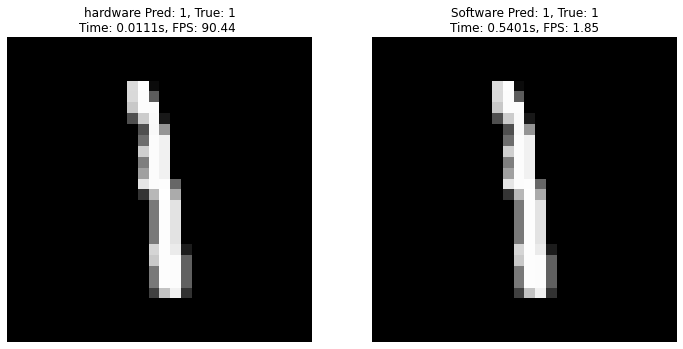

Software results (Sample 30):
Inference time: 0.5401 seconds
Predicted digit: 1, Actual digit: 1
FPS: 1.85


In [15]:
import time
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import threading
import queue

def process_next_sample(num_samples=30):
    plt.ion()  # Turn on interactive mode
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    fig.canvas.draw()  # Draw the initial empty figure
    display(fig)

    hw_queue = queue.Queue()
    sw_queue = queue.Queue()

    def hw_inference(sample, label):
        hw_start_time = time.time()
        hw_prediction = hw_lenet(sample.ravel())
        hw_predicted_class = np.argmax(hw_prediction)
        hw_inference_time = time.time() - hw_start_time
        hw_fps = 1 / hw_inference_time
        hw_gops, total_ops, conv1_ops, conv2_ops, dense_ops = calculate_total_gops(hw_inference_time)
        hw_queue.put((sample, label, hw_predicted_class, hw_inference_time, hw_fps, hw_gops))

    def sw_inference(sample, label):
        sw_start_time = time.time()
        sw_prediction = numpy_inference(sample, loaded_weights)
        sw_predicted_class = np.argmax(sw_prediction, axis=1)[0]
        sw_inference_time = time.time() - sw_start_time
        sw_fps = 1 / sw_inference_time
        sw_queue.put((sample, label, sw_predicted_class, sw_inference_time, sw_fps))

    sample_count = 0
    hw_done = False
    sw_done = False

    while sample_count < num_samples:
        if not hw_done and not sw_done:
            try:
                test_sample, test_label = test_iterator.next()
                sample_count += 1
                threading.Thread(target=hw_inference, args=(test_sample, test_label)).start()
                threading.Thread(target=sw_inference, args=(test_sample, test_label)).start()
            except StopIteration:
                hw_done = True
                sw_done = True
                print("Reached the end of the test dataset.")

        if not hw_queue.empty():
            sample, label, hw_predicted_class, hw_inference_time, hw_fps, hw_gops = hw_queue.get()
            ax1.clear()
            ax1.imshow(sample.squeeze(), cmap='gray')
            ax1.set_title(f"hardware Pred: {hw_predicted_class}, True: {label[0]}\n"
                          f"Time: {hw_inference_time:.4f}s, FPS: {hw_fps:.2f} ")
            ax1.axis('off')
            fig.canvas.draw()
            clear_output(wait=True)
            display(fig)
            print(f"Hardware results (Sample {sample_count}):")
            print(f"Inference time: {hw_inference_time:.4f} seconds")
            print(f"Predicted digit: {hw_predicted_class}, Actual digit: {label[0]}")
            print(f"FPS: {hw_fps:.2f}")
            print(f"GOPS: {hw_gops:.2f}")

        if not sw_queue.empty():
            sample, label, sw_predicted_class, sw_inference_time, sw_fps = sw_queue.get()
            ax2.clear()
            ax2.imshow(sample.squeeze(), cmap='gray')
            ax2.set_title(f"Software Pred: {sw_predicted_class}, True: {label[0]}\n"
                          f"Time: {sw_inference_time:.4f}s, FPS: {sw_fps:.2f}")
            ax2.axis('off')
            fig.canvas.draw()
            clear_output(wait=True)
            display(fig)
            print(f"Software results (Sample {sample_count}):")
            print(f"Inference time: {sw_inference_time:.4f} seconds")
            print(f"Predicted digit: {sw_predicted_class}, Actual digit: {label[0]}")
            print(f"FPS: {sw_fps:.2f}")

        plt.pause(0.001)   

    plt.ioff()   
    plt.close(fig)
process_next_sample()

In [ ]:
del a,b,c,d,e,f

In [16]:
import time
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import threading
import queue

def process_next_sample(num_samples=20):
    plt.ion()  # Turn on interactive mode
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    plt.show()  # Show the figure

    hw_queue = queue.Queue()
    sw_queue = queue.Queue()

    def hw_inference(sample, label):
        hw_start_time = time.time()
        hw_prediction = hw_lenet(sample.ravel())
        hw_predicted_class = np.argmax(hw_prediction)
        hw_inference_time = time.time() - hw_start_time
        hw_fps = 1 / hw_inference_time
        hw_gops, total_ops, conv1_ops, conv2_ops, dense_ops = calculate_total_gops(hw_inference_time)
        hw_queue.put((sample, label, hw_predicted_class, hw_inference_time, hw_fps, hw_gops))

    def sw_inference(sample, label):
        sw_start_time = time.time()
        sw_prediction = numpy_inference(sample, loaded_weights)
        sw_predicted_class = np.argmax(sw_prediction, axis=1)[0]
        sw_inference_time = time.time() - sw_start_time
        sw_fps = 1 / sw_inference_time
        sw_queue.put((sample, label, sw_predicted_class, sw_inference_time, sw_fps))

    sample_count = 0
    hw_done = False
    sw_done = False

    hw_times = []
    sw_times = []
    hw_fps_list = []
    sw_fps_list = []
    hw_gops_list = []

    while sample_count < num_samples:
        if not hw_done and not sw_done:
            try:
                test_sample, test_label = test_iterator.next()
                sample_count += 1
                threading.Thread(target=hw_inference, args=(test_sample, test_label)).start()
                threading.Thread(target=sw_inference, args=(test_sample, test_label)).start()
            except StopIteration:
                hw_done = True
                sw_done = True
                print("Reached the end of the test dataset.")

        if not hw_queue.empty():
            sample, label, hw_predicted_class, hw_inference_time, hw_fps, hw_gops = hw_queue.get()
            hw_times.append(hw_inference_time)
            hw_fps_list.append(hw_fps)
            hw_gops_list.append(hw_gops)
            ax1.clear()
            ax1.plot(range(len(hw_times)), hw_times, 'b-')
            ax1.set_title(f"HW Inference Times\nLatest: {hw_inference_time:.4f}s, FPS: {hw_fps:.2f}")
            ax1.set_xlabel("Sample")
            ax1.set_ylabel("Inference Time (s)")

        if not sw_queue.empty():
            sample, label, sw_predicted_class, sw_inference_time, sw_fps = sw_queue.get()
            sw_times.append(sw_inference_time)
            sw_fps_list.append(sw_fps)
            ax2.clear()
            ax2.plot(range(len(sw_times)), sw_times, 'r-')
            ax2.set_title(f"SW Inference Times\nLatest: {sw_inference_time:.4f}s, FPS: {sw_fps:.2f}")
            ax2.set_xlabel("Sample")
            ax2.set_ylabel("Inference Time (s)")

        plt.tight_layout()
        fig.canvas.draw()
        fig.canvas.flush_events()
        
        plt.pause(0.001)

    plt.ioff()  # Turn off interactive mode
    plt.close(fig)

    print(f"Processed {sample_count} samples.")

    return {
        'hw_times': hw_times,
        'sw_times': sw_times,
        'hw_fps_list': hw_fps_list,
        'sw_fps_list': sw_fps_list,
        'hw_gops_list': hw_gops_list,
        'sample_count': sample_count
    }

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def plot_summary_graphs(data):
    hw_times = data['hw_times']
    sw_times = data['sw_times']
    hw_fps_list = data['hw_fps_list']
    sw_fps_list = data['sw_fps_list']
    hw_gops_list = data['hw_gops_list']
    sample_count = data['sample_count']
    
    # Calculate means and standard deviations for error bars
    hw_fps_mean, hw_fps_std = np.mean(hw_fps_list), np.std(hw_fps_list)
    sw_fps_mean, sw_fps_std = np.mean(sw_fps_list), np.std(sw_fps_list)
    hw_time_mean, hw_time_std = np.mean(hw_times), np.std(hw_times)
    sw_time_mean, sw_time_std = np.mean(sw_times), np.std(sw_times)
    hw_gops_mean, hw_gops_std = np.mean(hw_gops_list), np.std(hw_gops_list)

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

    # FPS comparison with error bars
    ax1.bar(['Hardware', 'Software'], [hw_fps_mean, sw_fps_mean], 
            yerr=[hw_fps_std, sw_fps_std], capsize=5, color=['#1f77b4', '#ff7f0e'])
    ax1.set_title('Average FPS Comparison', fontsize=16)
    ax1.set_ylabel('Frames per Second', fontsize=14)
    ax1.grid(True, which='both', linestyle='--', linewidth=0.7)
    ax1.tick_params(axis='both', which='major', labelsize=12)
    
    # Display values on top of the bars
    ax1.text(0, hw_fps_mean + hw_fps_std, f'{hw_fps_mean:.2f}', ha='center', fontsize=12)
    ax1.text(1, sw_fps_mean + sw_fps_std, f'{sw_fps_mean:.2f}', ha='center', fontsize=12)

    # Inference Time comparison with error bars
    ax2.bar(['Hardware', 'Software'], [hw_time_mean, sw_time_mean], 
            yerr=[hw_time_std, sw_time_std], capsize=5, color=['#1f77b4', '#ff7f0e'])
    ax2.set_title('Average Inference Time Comparison', fontsize=16)
    ax2.set_ylabel('Time (s)', fontsize=14)
    ax2.grid(True, which='both', linestyle='--', linewidth=0.7)
    ax2.tick_params(axis='both', which='major', labelsize=12)
    
    # Display values on top of the bars
    ax2.text(0, hw_time_mean + hw_time_std, f'{hw_time_mean:.4f}s', ha='center', fontsize=12)
    ax2.text(1, sw_time_mean + sw_time_std, f'{sw_time_mean:.4f}s', ha='center', fontsize=12)

    # GOPS for Hardware with error bars
    ax3.bar(['Hardware'], [hw_gops_mean], yerr=[hw_gops_std], capsize=5, color=['#1f77b4'])
    ax3.set_title('Average GOPS for Hardware', fontsize=16)
    ax3.set_ylabel('GOPS', fontsize=14)
    ax3.grid(True, which='both', linestyle='--', linewidth=0.7)
    ax3.tick_params(axis='both', which='major', labelsize=12)
    
    # Display value on top of the bar
    ax3.text(0, hw_gops_mean + hw_gops_std, f'{hw_gops_mean:.2f}', ha='center', fontsize=12)

    plt.tight_layout()
    plt.show()

    # Print summary statistics
    print(f"Processed {sample_count} samples.")
    print(f"Hardware - Avg FPS: {hw_fps_mean:.2f} ± {hw_fps_std:.2f}, Avg Time: {hw_time_mean:.4f}s ± {hw_time_std:.4f}s, Avg GOPS: {hw_gops_mean:.2f} ± {hw_gops_std:.2f}")
    print(f"Software - Avg FPS: {sw_fps_mean:.2f} ± {sw_fps_std:.2f}, Avg Time: {sw_time_mean:.4f}s ± {sw_time_std:.4f}s")
    
    # Calculate and print speed-up
    fps_speedup = hw_fps_mean / sw_fps_mean
    time_speedup = sw_time_mean / hw_time_mean
    print(f"Speed-up - FPS: {fps_speedup:.2f}x, Time: {time_speedup:.2f}x")



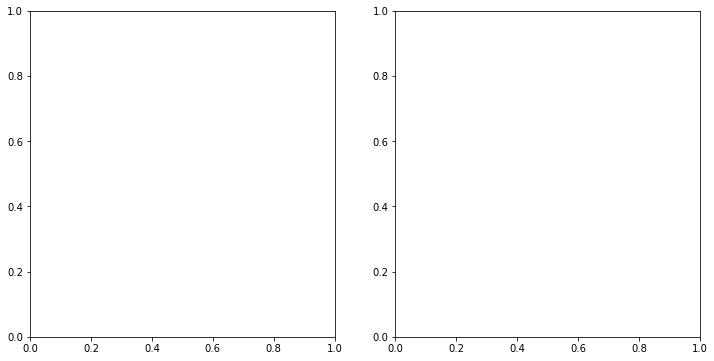

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

Processed 20 samples.


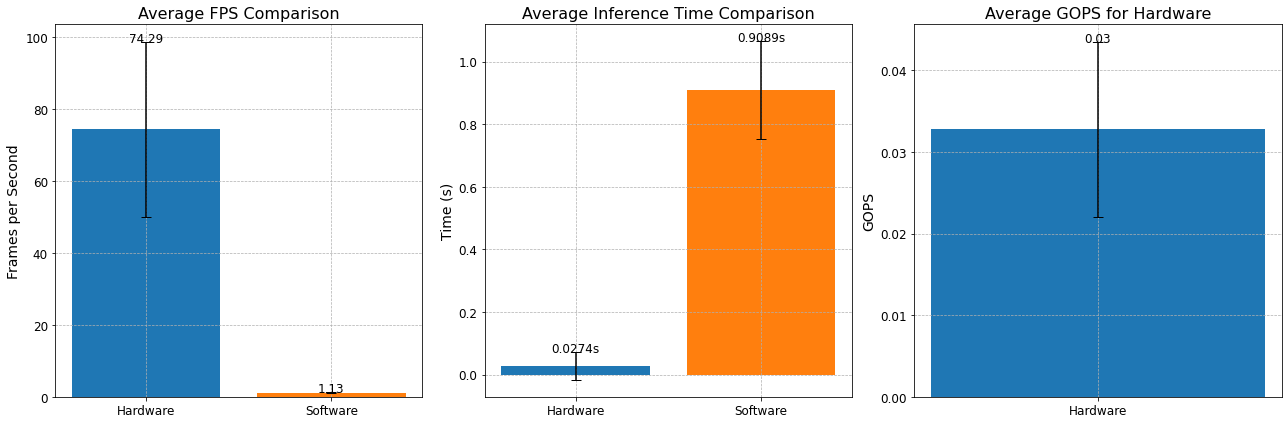

Processed 20 samples.
Hardware - Avg FPS: 74.29 ± 24.23, Avg Time: 0.0274s ± 0.0443s, Avg GOPS: 0.03 ± 0.01
Software - Avg FPS: 1.13 ± 0.20, Avg Time: 0.9089s ± 0.1560s
Speed-up - FPS: 65.62x, Time: 33.14x


In [22]:
# First, run the processing and collect the data
data = process_next_sample()

# Then, plot the summary graphs
plot_summary_graphs(data)